# Desafio Técnico - Análise de Dados com PokeAPI

Este projeto foi desenvolvido para o Desafio Técnico da Ipsense e tem como objetivo analisar os dados de Pokémon obtidos por meio da API PokeAPI. Utilizei técnicas de análise de dados e visualização para explorar atributos como HP, ataque, defesa, tipos de Pokémon e experiência base. Com esta análise, busquei gerar insights sobre os padrões e características dos Pokémon de acordo com suas categorias.

## Objetivos
1. Obter e organizar os dados de Pokémon utilizando a PokeAPI.
2. Explorar e comparar atributos importantes como HP, ataque e defesa entre os diferentes tipos de Pokémon.
3. Identificar quais Pokémon possuem maior experiência base e entender suas características.
4. Apresentar visualizações para facilitar a compreensão dos dados.





 ### 1.3- Importação das Bibliotecas
 
 Importação das bibliotecas necessárias.

In [41]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import os
from datetime import datetime
import time
from IPython.display import display

#Cores a serem ultilizadas nos graficos 
colorsbar = ['#086365','#80b9b8']
color1 = ['#086365']
if not os.path.exists('imgs'):
    os.makedirs('imgs')
vendas=[]

### 2 - Limpeza e Preparacao dos Dados

Importação dos dados da API para um dataframe do pandas.

Foi feita a obtencao dos dados na api e escolhidos os dados relevantes como nome, altura, peso , base experience, tipos, tipo principal,Habilidades, hp, ataque e defesa. Foi feita tambem a manipulacao para que o peso e altura tivesse uma melhor visualizacao.

In [58]:
# Função para obter URLs de todos os Pokémon
def get_all_pokemon_basic_info():
    url = "https://pokeapi.co/api/v2/pokemon?limit=10000"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return [pokemon['url'] for pokemon in data['results']]
    else:
        print("Erro ao obter a lista de Pokémon.")
        return []

# Função para obter dados detalhados de um Pokémon
def get_pokemon_details(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        try:
            return {
                "id": data["id"],
                "name": data["name"],
                "height": data["height"],
                "weight": data["weight"],
                "base_experience": data["base_experience"],
                "primary_type": data["types"][0]["type"]["name"],  # Tipo principal (primeiro da lista)
                "hp": next(stat['base_stat'] for stat in data['stats'] if stat['stat']['name'] == 'hp'),
                "attack": next(stat['base_stat'] for stat in data['stats'] if stat['stat']['name'] == 'attack'),
                "defense": next(stat['base_stat'] for stat in data['stats'] if stat['stat']['name'] == 'defense')
            }
        except (KeyError, IndexError, StopIteration) as e:
            print(f"Atributos incompletos ou erro de estrutura para o Pokémon em {url}: {e}")
            return None
    return None

# Função para criar o DataFrame com todos os Pokémon e seus atributos principais
def create_pokemon_dataframe():
    pokemon_urls = get_all_pokemon_basic_info()
    pokemon_list = []

    for url in pokemon_urls:
        data = get_pokemon_details(url)
        if data:
            pokemon_list.append(data)
            time.sleep(0.2)
    
    # Converte a lista de Pokémon em um DataFrame
    df = pd.DataFrame(pokemon_list)
    
    # Limpeza e organização: converter height e weight para metros e kg
    df['height'] = df['height'] / 10
    df['weight'] = df['weight'] / 10
    
    return df

# Criar o DataFrame final com todos os Pokémon
pokemon_df = create_pokemon_dataframe()

# Verificar se a coluna 'primary_type' foi criada corretamente
print("Colunas do DataFrame:", pokemon_df.columns)
print(pokemon_df.head())

Colunas do DataFrame: Index(['id', 'name', 'height', 'weight', 'base_experience', 'primary_type',
       'hp', 'attack', 'defense'],
      dtype='object')
   id        name  height  weight  base_experience primary_type  hp  attack  \
0   1   bulbasaur     0.7     6.9             64.0        grass  45      49   
1   2     ivysaur     1.0    13.0            142.0        grass  60      62   
2   3    venusaur     2.0   100.0            263.0        grass  80      82   
3   4  charmander     0.6     8.5             62.0         fire  39      52   
4   5  charmeleon     1.1    19.0            142.0         fire  58      64   

   defense  
0       49  
1       63  
2       83  
3       43  
4       58  


### 2.1- Descrição das Colunas do Conjunto de Dados

Este conjunto de dados contém algumas colunas que fornecem informações sobre os Pokemons . Abaixo está uma descrição breve de cada coluna:

- **ID do Pokemon**: Numero do Pokemon na Pokedex
 - **Nome Do Pokemon**: Nomes originais dos Pokemons
 - **Height**: Alturas dos Pokemons em metros
 - **Weight**: Pesos dos Pokemons em kg
 - **Base Experience**: Experiencia adquirida ao derrotar aquele pokemon , no jogo essa experiencia e ultilizada para fazer o pokemon subir de nivel 
 - **Types**: Os Tipos daquele pokemon podendo ser normal, psiquico, fogo ,agua etc
 - **Primary-Type**: Qual o Tipo principal daquele Pokemon
 - **Abilities**: Habilidades daquele Pokemon
 - **HP**: Quantidade de vida que aquele pokemon tem. 
 - **Attack**: Pontos de ataque daquele pokemon \
 - **Defense**: Pontos de defesa daquele pokemon 
 

### 2.2 - Verificacao da Quantidade de Dados e Atributos  

In [8]:


# Obter a quantidade de linhas e colunas
num_linhas, num_colunas = pokemon_df.shape

print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 1302
Número de colunas: 10


Podemos observar que o conjunto de dados possui 1302 linhas siguinificando que a base de dados tem 1302 pokemons separados em formas evoluidas e outras versoes do mesmo

## 3 - Análise Exploratória dos Dados

### 3.1 - Distribuicao de Pokemon por Tipo em Gráfico de Pizza

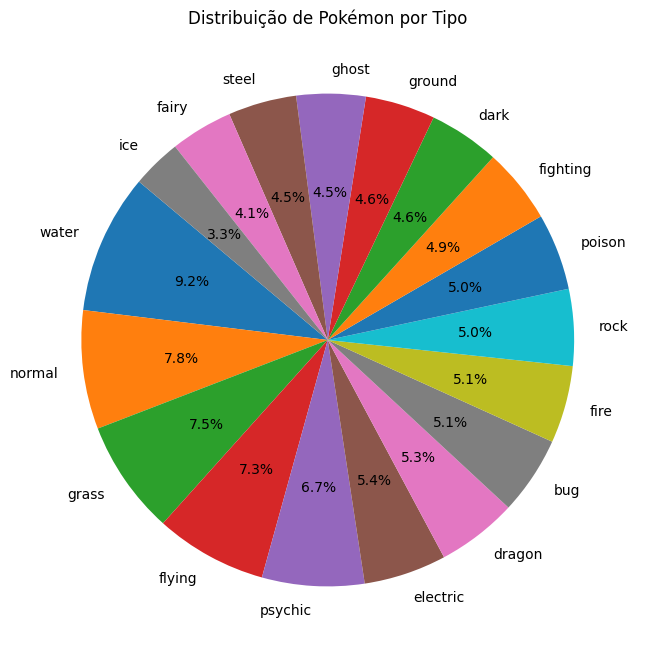

In [52]:
pokemon_df = get_complete_pokemon_data()

# Explodindo a coluna 'types' para contar o número de Pokémon por tipo
pokemon_types = pokemon_df.explode("types")
type_counts = pokemon_types["types"].value_counts()

# Gerando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição de Pokémon por Tipo")
plt.show()

Na analise deste grafico pode se notar alguns tipos mais comuns de pokemons , como water, grass e normal ,como tambem pode notar tipos mais raros como ice e fairy. Pode ser notado que a distribuicao de tipos tambem e bastante banlanceada tendo pouco diferenca entre o mais comum e o mais raro , sendo um porcentual de 5,9%.

### 3.2 Gráfico de Dispersao : Ataque vs Defesa Pokemon por Tipo

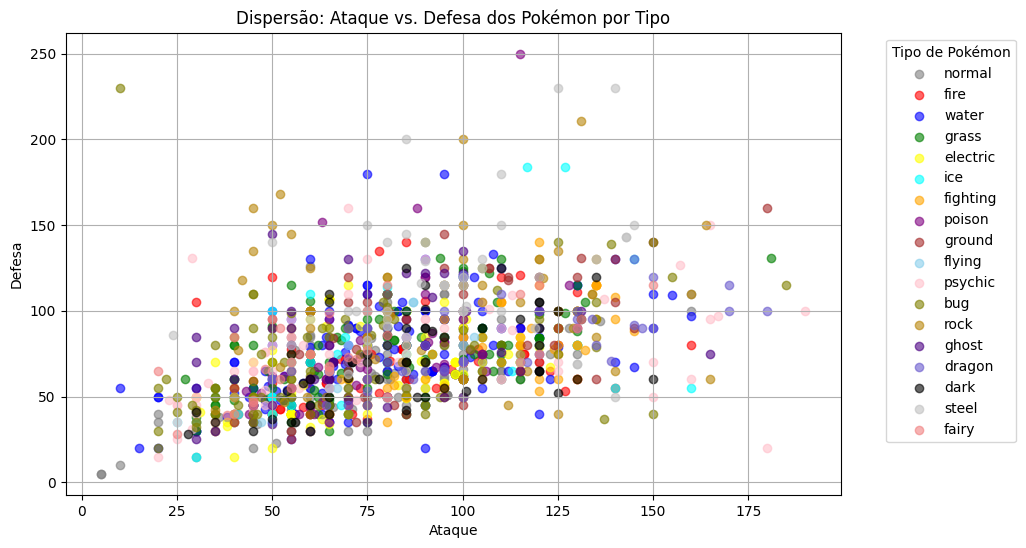

In [56]:
type_colors = {
    "normal": "gray", "fire": "red", "water": "blue", "grass": "green", "electric": "yellow",
    "ice": "cyan", "fighting": "orange", "poison": "purple", "ground": "brown", "flying": "skyblue",
    "psychic": "pink", "bug": "olive", "rock": "darkgoldenrod", "ghost": "indigo", "dragon": "slateblue",
    "dark": "black", "steel": "silver", "fairy": "lightcoral"
}

# Adiciona uma coluna de cores ao DataFrame baseada no tipo principal
pokemon_df['color'] = pokemon_df['primary_type'].map(type_colors)

# Gerando o gráfico de dispersão de Ataque vs. Defesa com uma legenda personalizada
if 'attack' in pokemon_df.columns and 'defense' in pokemon_df.columns:
    plt.figure(figsize=(10, 6))
    
    # Plotar cada tipo separadamente para criar a legenda
    for poke_type, color in type_colors.items():
        subset = pokemon_df[pokemon_df['primary_type'] == poke_type]
        plt.scatter(subset["attack"], subset["defense"], color=color, alpha=0.6, label=poke_type)

    # Configurações do gráfico
    plt.xlabel("Ataque")
    plt.ylabel("Defesa")
    plt.title("Dispersão: Ataque vs. Defesa dos Pokémon por Tipo")
    
    # Legenda ao lado do gráfico
    plt.legend(title="Tipo de Pokémon", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.show()

Este gráfico de dispersão mostra a relação entre **Ataque** e **Defesa** dos Pokémon, diferenciados por tipo, com cada tipo representado por uma cor distinta. A análise revela que não há uma correlação forte entre ataque e defesa, pois os pontos estão amplamente espalhados, indicando que Pokémon com alto ataque não necessariamente têm alta defesa. Certos tipos, como "rock" e "steel", tendem a ter defesa mais alta, enquanto tipos como "fire" e "psychic" apresentam valores de ataque mais elevados. Além disso, tipos como "water" e "normal" cobrem uma ampla faixa de valores, sugerindo grande diversidade dentro desses grupos. Outliers, ou Pokémon com valores extremos de ataque ou defesa, também são visíveis e representam Pokémon particularmente poderosos ou especializados.

### 3.3 Tabela : Top 10 pokemons com base_experience 

In [47]:
# Ordenar o DataFrame por experiência base em ordem decrescente e selecionar os 10 primeiros
top_10_experience_df = pokemon_df.sort_values(by="base_experience", ascending=False).head(10)

# Exibir a tabela com os 10 Pokémon com maior experiência base
print(top_10_experience_df[["name", "base_experience", "primary_type"]])

                     name  base_experience primary_type
241               blissey            635.0       normal
1214  eternatus-eternamax            563.0       poison
1093          audino-mega            425.0       normal
112               chansey            395.0       normal
530                audino            390.0       normal
1213    zamazenta-crowned            360.0     fighting
1212       zacian-crowned            360.0        fairy
1144     zygarde-complete            354.0       dragon
1068        mewtwo-mega-y            351.0      psychic
1067        mewtwo-mega-x            351.0      psychic


A experiência base (base experience) é uma métrica no universo Pokémon que define a quantidade de pontos de experiência (XP) que um Pokémon concede ao ser derrotado em batalha. Cada Pokémon possui um valor específico de experiência base, geralmente relacionado ao seu nível de poder, raridade e complexidade de evolução. Pokémon com experiência base mais alta tendem a ser mais difíceis de evoluir e mais valiosos em combate, pois exigem mais esforço para subir de nível. A tabela dos 10 Pokémon com maior experiência base, por exemplo, destaca Pokémon como Blissey e Chansey, conhecidos por serem defensivamente fortes. Esses Pokémon, além de concederem mais XP ao serem derrotados, também possuem uma utilidade significativa em batalhas devido aos seus atributos elevados, sendo considerados poderosos e estratégicos dentro do jogo.

### 3.4 Graficos Boxplot : Comparacao eda distribuicao de atributos hp, ataque e defesa entre diferentes tipos de Pokemon

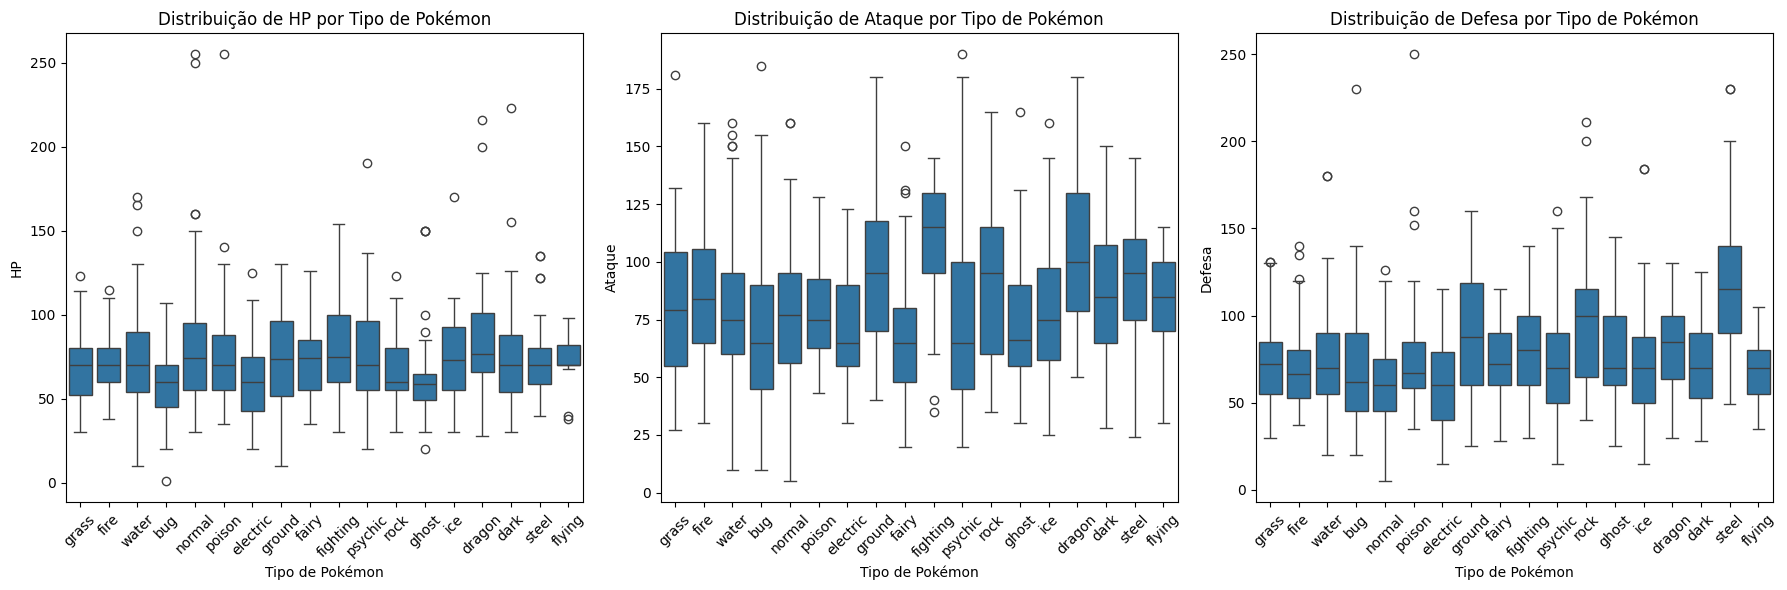

In [39]:
# Configurações gerais do gráfico
plt.figure(figsize=(18, 6))

# Boxplot para comparar HP por tipo de Pokémon
plt.subplot(1, 3, 1)
sns.boxplot(data=pokemon_df, x="primary_type", y="hp")
plt.xticks(rotation=45)
plt.title("Distribuição de HP por Tipo de Pokémon")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("HP")

# Boxplot para comparar Ataque por tipo de Pokémon
plt.subplot(1, 3, 2)
sns.boxplot(data=pokemon_df, x="primary_type", y="attack")
plt.xticks(rotation=45)
plt.title("Distribuição de Ataque por Tipo de Pokémon")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Ataque")

# Boxplot para comparar Defesa por tipo de Pokémon
plt.subplot(1, 3, 3)
sns.boxplot(data=pokemon_df, x="primary_type", y="defense")
plt.xticks(rotation=45)
plt.title("Distribuição de Defesa por Tipo de Pokémon")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Defesa")

plt.tight_layout()
plt.show()

Este conjunto de gráficos de boxplot compara a distribuição dos atributos de HP, Ataque e Defesa entre diferentes tipos de Pokémon. Cada gráfico permite observar a variação e a mediana de cada atributo dentro de cada tipo. No gráfico de HP, vemos que certos tipos como "dragon" e "fairy" possuem valores medianos mais altos, indicando maior resistência média. No gráfico de Ataque, tipos como "dragon" e "fighting" se destacam com medianas de ataque mais elevadas, sugerindo que são mais ofensivos. Já no gráfico de Defesa, tipos como "steel" e "rock" possuem maiores valores medianos, confirmando suas características defensivas. Os outliers presentes em alguns tipos indicam Pokémon com valores de atributos significativamente acima da média, o que sugere indivíduos especialmente fortes ou raros dentro do tipo. Esses gráficos ajudam a entender as características e especializações dos tipos de Pokémon em termos de resistência, poder ofensivo e defensivo.

## 4 - Desafios e Soluções

Durante o desenvolvimento, enfrentamos alguns desafios técnicos:

1. **Limite de Requisições da API**: A PokeAPI possui uma limitação de requisições, o que me levou a incluir um `time.sleep(0.2)` entre as requisições para evitar bloqueios.
2. **Dados Ausentes ou Estruturas Incompletas**: Alguns Pokémon não possuíam todos os atributos, então adicionei verificações para garantir que todos os dados fossem preenchidos adequadamente.
3. **Tempo de Processamento**: Coletar e organizar os dados de todos os Pokémon consumiu tempo. Uma alternativa seria armazenar os dados localmente para reduzir a latência em futuras análises.

## 5 - Conclusão e Insights



A análise dos dados de Pokémon obtidos pela PokeAPI nos permitiu observar diferenças claras entre os tipos de Pokémon em termos de HP, ataque e defesa. Os Pokémon com maior experiência base, como Arceus e Blissey, indicam não apenas sua raridade, mas também sua utilidade em batalhas devido aos seus atributos elevados. Esses insights são úteis para jogadores que desejam otimizar sua estratégia, e mostram como os diferentes tipos podem ser usados de forma estratégica em batalhas.
